<a href="https://colab.research.google.com/github/joao862/submit50/blob/main/Supervised%20Learning/Multi_Class_Prediction_of_Obesity_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Multi-Class Prediction of Obesity Risk](https://www.kaggle.com/competitions/playground-series-s4e2)

### Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note: This dataset is particularly well suited for visualizations, clustering, and general EDA. Show off your skills!

### Files
train.csv - the training dataset; NObeyesdad is the categorical target

test.csv - the test dataset; your objective is to predict the class of NObeyesdad for each row

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

train_data  = "https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/main/Supervised%20Learning/Datasets/playground-series-s4e2/train.csv"
test_data = "https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/main/Supervised%20Learning/Datasets/playground-series-s4e2/test.csv"

# Load the dataset
train_data = pd.read_csv(train_data)

In [2]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [23]:
#let's see the unique values of the no float variables
train_data[["family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]].nunique()

,0
family_history_with_overweight,2
FAVC,2
CAEC,4
SMOKE,2
SCC,2
CALC,3
MTRANS,5
NObeyesdad,7


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


<Axes: xlabel='NObeyesdad'>

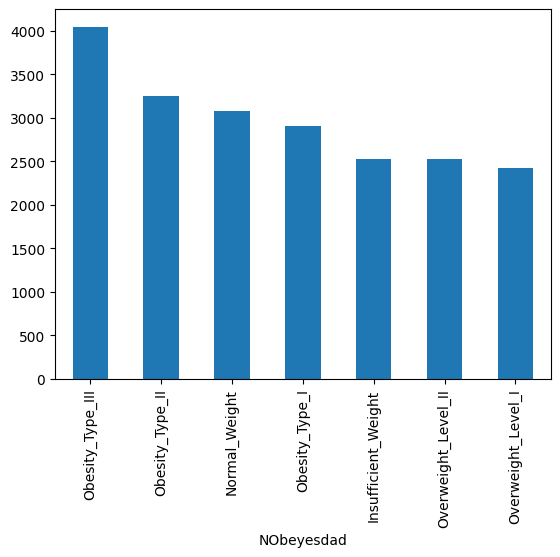

In [8]:
obisity_types = train_data["NObeyesdad"].value_counts()
obisity_types.plot(kind="bar")

<Axes: xlabel='Gender'>

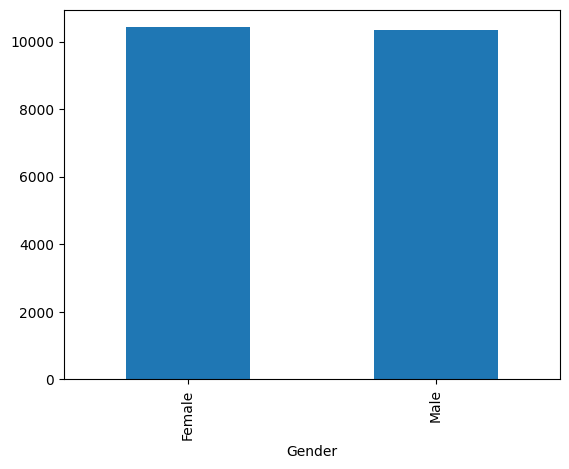

In [7]:
gender_counts = train_data["Gender"].value_counts()
#create a bar plot
gender_counts.plot(kind="bar")

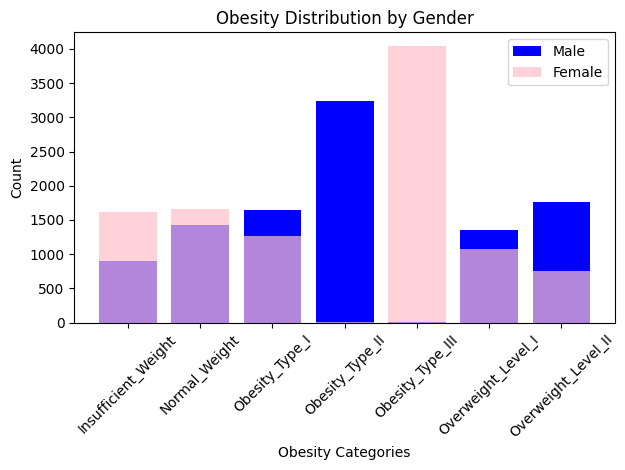

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by gender and obesity category
gender_obisity = train_data.groupby(["Gender", "NObeyesdad"]).size().reset_index(name="Count")

# Separating data for male and female
male_data = gender_obisity[gender_obisity["Gender"] == "Male"]
female_data = gender_obisity[gender_obisity["Gender"] == "Female"]

# Plotting male data
plt.bar(male_data["NObeyesdad"], male_data["Count"], color="blue", label="Male")

# Plotting female data (adjusting position to avoid overlap)
plt.bar(female_data["NObeyesdad"], female_data["Count"], color="pink", label="Female", alpha=0.7)

# Adding labels and title
plt.xlabel("Obesity Categories")
plt.ylabel("Count")
plt.title("Obesity Distribution by Gender")
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()



In [24]:
#let's normalize the gender using a one-hot encoding
train_data = pd.get_dummies(train_data, columns = ["family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"])
train_data.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,False,...,False,True,False,False,False,False,False,False,False,True
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,True,...,False,False,False,False,True,False,False,False,False,False
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,True,...,False,True,False,True,False,False,False,False,False,False
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,True,...,False,True,False,False,False,False,False,True,False,False
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,False,...,False,True,False,False,False,False,False,False,False,True


Per usual, start with some EDA, bar charts and/or correlation

<Axes: >

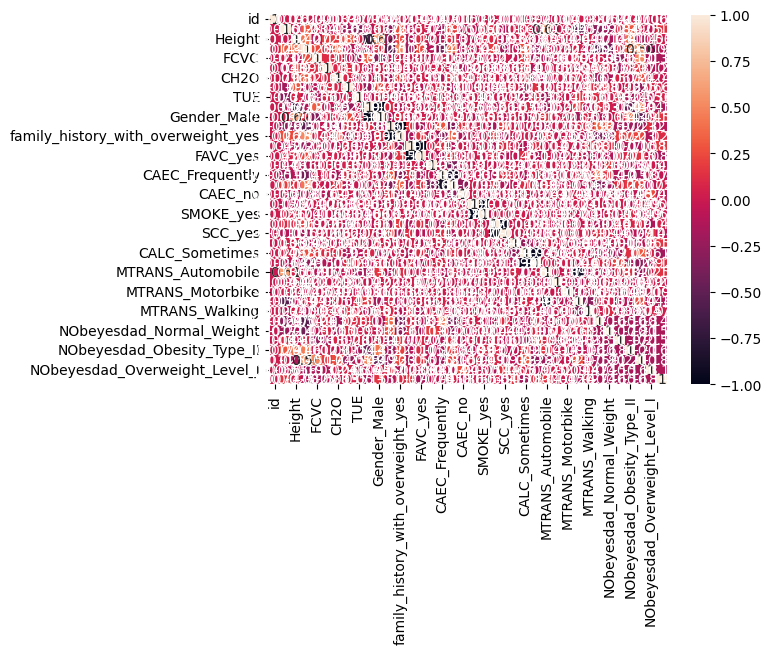

In [26]:
#let's create a correlation matrix
corr_matrix = train_data.corr()
corr_matrix
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)

Text(0.5, 1.0, 'Correlation with Obesity_Type_I')

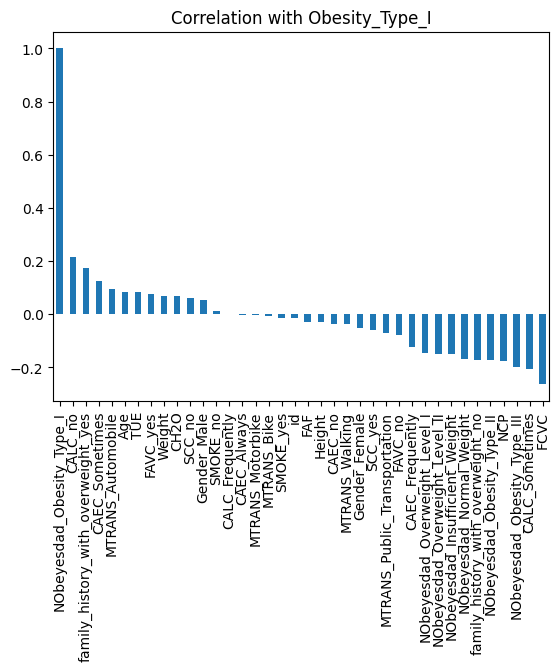

In [33]:
#from the correlation matrix let's find the biggest correlations variables
#let's extract the biggest correlation variables form that
corr_matrix["NObeyesdad_Obesity_Type_I"].sort_values(ascending=False).plot(kind = "bar")
#let's add a title
plt.title("Correlation with Obesity_Type_I")

NObeyesdad_Obesity_Type_II            1.000000
Weight                                0.458925
Gender_Male                           0.430357
Height                                0.406817
Age                                   0.292682
family_history_with_overweight_yes    0.200312
CAEC_Sometimes                        0.176070
MTRANS_Automobile                     0.137959
CALC_Sometimes                        0.124728
FAVC_yes                              0.106140
SMOKE_yes                             0.092903
SCC_no                                0.076717
FAF                                   0.024575
NCP                                   0.022657
id                                    0.016998
MTRANS_Motorbike                     -0.009138
MTRANS_Bike                          -0.013543
FCVC                                 -0.016705
CH2O                                 -0.031396
CAEC_no                              -0.047967
CAEC_Always                          -0.057281
CALC_Frequent

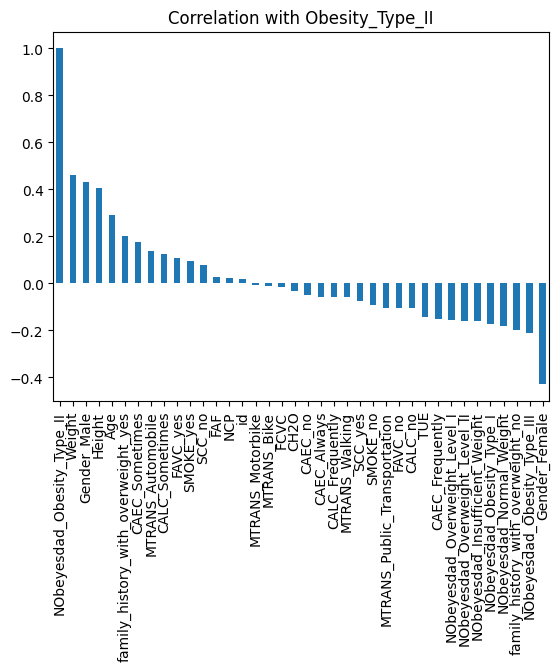

In [36]:
#from the correlation matrix let's find the biggest correlations variables
#let's extract the biggest correlation variables form that
corr_matrix["NObeyesdad_Obesity_Type_II"].sort_values(ascending=False).plot(kind = "bar")
#let's add a title
plt.title("Correlation with Obesity_Type_II")
print(corr_matrix["NObeyesdad_Obesity_Type_II"].sort_values(ascending=False))

NObeyesdad_Obesity_Type_III           1.000000
Weight                                0.556033
FCVC                                  0.511312
Gender_Female                         0.488788
CALC_Sometimes                        0.302435
CH2O                                  0.244962
MTRANS_Public_Transportation          0.243030
family_history_with_overweight_yes    0.230498
CAEC_Sometimes                        0.209839
NCP                                   0.166453
FAVC_yes                              0.150070
SCC_no                                0.091032
SMOKE_no                              0.049269
Age                                   0.024658
id                                    0.010609
MTRANS_Bike                          -0.019334
MTRANS_Motorbike                     -0.021072
SMOKE_yes                            -0.049269
TUE                                  -0.055494
CAEC_no                              -0.057431
MTRANS_Walking                       -0.074646
CAEC_Always  

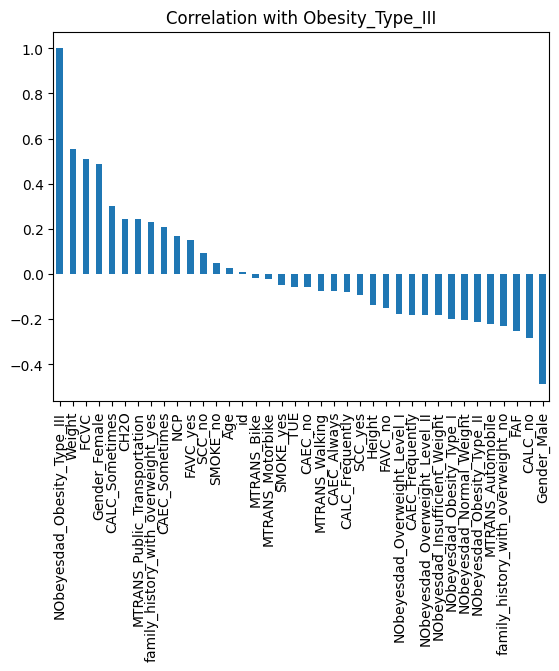

In [39]:
#from the correlation matrix let's find the biggest correlations variables
#let's extract the biggest correlation variables form that
corr_matrix["NObeyesdad_Obesity_Type_III"].sort_values(ascending=False).plot(kind = "bar")
#let's add a title
plt.title("Correlation with Obesity_Type_III")
print(corr_matrix["NObeyesdad_Obesity_Type_III"].sort_values(ascending=False))

NObeyesdad_Insufficient_Weight        1.000000
CAEC_Frequently                       0.414924
family_history_with_overweight_no     0.381122
SCC_yes                               0.122387
TUE                                   0.114997
Gender_Female                         0.104463
FAF                                   0.097636
CALC_no                               0.089177
NCP                                   0.083438
FAVC_no                               0.081244
MTRANS_Public_Transportation          0.051168
SMOKE_no                              0.031095
FCVC                                  0.023612
MTRANS_Walking                        0.017139
id                                    0.000640
MTRANS_Motorbike                     -0.002134
MTRANS_Bike                          -0.007100
CAEC_Always                          -0.022704
SMOKE_yes                            -0.031095
CAEC_no                              -0.033174
CALC_Frequently                      -0.047054
MTRANS_Automo

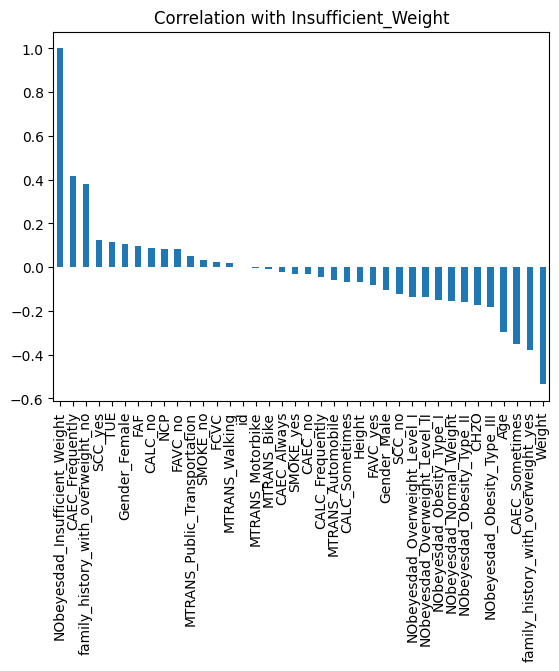

In [40]:
#from the correlation matrix let's find the biggest correlations variables
#let's extract the biggest correlation variables form that
corr_matrix["NObeyesdad_Insufficient_Weight"].sort_values(ascending=False).plot(kind = "bar")
#let's add a title
plt.title("Correlation with Insufficient_Weight")
print(corr_matrix["NObeyesdad_Insufficient_Weight"].sort_values(ascending=False))

Now pre-process and perform feature engineering.

P.s Use at least 5 features.

In [ ]:
#p.s this is just an implementation suggestion, feel free to split it into smaller steps
def preprocess_data(data):
    """
    Preprocess the data by handling categorical values and scaling features.
    """
    # Encode features and label
    # TODO

    # Separate features and target
    X = #TODO
    y = #TODO

    # Scale features
    # TODO
    # p.s some algorithms dont 'gain' much from scaling

    return X, y

# Preprocess training data
X, y = preprocess_data(train_data)

Its training time i.e hyperparameter search, cross validation and evaluation.

1. [Logistic Regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) - with [OVR](https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) and [OVO](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)
2. KNN
3. Naive-Bayes

P.s read the documentation

In [ ]:
# Preprocess training data
X, y = preprocess_data(train_data)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#Note: what about data leakage ? Is something wrong here?

#Remember to do hyperparameter search for example with https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

y_pred_log_reg = #TOOD
y_pred_knn = #TODO
y_pred_nb = #TODO


In [ ]:
# Evaluation Summary
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation Metrics for {model_name}:")
    print(classification_report(y_val, y_pred_nb))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")

evaluate_model(y_val, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_val, y_pred_knn, "KNN")
evaluate_model(y_val, y_pred_nb, "Naive Bayes")

## Discussion
1. Do we have a balanced dataset?
2. Which model is more balanced?
3. Any class trumps the rest?

Awesome work!

Try to submit your best results to the official kaggle competition! Pay close attention to the sample submission for it to be a valid submission.